In [58]:
import pandas as pd
#Loading our dataset using read_csv function of pandas
df = pd.read_csv('Housing_Data.csv')
#Inspecting the first 10 rows of the dataset
df.head(10)

,price_lac,area_sqft,bhk,bathrooms,balconies,floors,furnishing_type,location,property_type
0,20.0,560.0,1,2.0,1,6,Unfurnished,Brahmavar,Apartment
1,20.0,600.0,1,1.0,1,4,Unfurnished,Doddanagudde,Apartment
2,20.0,600.0,1,1.0,1,4,Unfurnished,Doddanagudde,Apartment
3,12.0,605.0,2,2.0,1,4,Semi furnished,Indrali,Apartment
4,15.0,605.0,2,2.0,1,4,Semi furnished,Indrali,Apartment
5,19.0,605.0,2,2.0,0,1,Unfurnished,Indrali,Apartment
6,17.0,612.0,2,NaN,0,3,NaN,Indrali,Apartment
7,16.0,620.0,2,2.0,0,1,Furnished,Indrali,Apartment
8,12.0,650.0,2,2.0,1,4,Semi furnished,Indrali,Apartment
9,20.0,650.0,2,2.0,1,4,Semi furnished,Indrali,Apartment


In [59]:
print(df.isnull().sum())

price_lac          0
area_sqft          2
bhk                0
bathrooms          3
balconies          0
floors             0
furnishing_type    2
location           0
property_type      0
dtype: int64


In [60]:
#We replace missing values of bathrooms column with mode as it is a categorical variable
df['bathrooms'].fillna(df.bathrooms.mode()[0],inplace=True)
#We replace missing values of area_sqft column with mode as it is a numerical variable
df['area_sqft'].fillna(df.area_sqft.mean(),inplace=True)
#We replace missing values of furnishing_type column with mode as it is a categorical variable
df['furnishing_type'].fillna(df.furnishing_type.mode()[0],inplace=True)

In [61]:
#Function to describe the dataset with basic summary statistics
df.describe()
#To include categorical variables in the output 
#df.describe(include = 'all')

,price_lac,area_sqft,bhk,bathrooms,balconies,floors
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,56.486277,1908.065217,2.446809,2.244681,1.127660,3.882979
std,38.841617,1467.322738,0.862816,0.799007,0.870472,2.816451
min,12.000000,560.000000,1.000000,1.000000,0.000000,1.000000
25%,31.000000,1000.000000,2.000000,2.000000,0.000000,2.000000
50%,48.000000,1460.000000,2.000000,2.000000,1.000000,3.000000
75%,63.000000,2344.500000,3.000000,2.000000,2.000000,5.000000
max,180.000000,8720.000000,5.000000,5.000000,3.000000,12.000000


In [62]:
#MEAN - The average value of the variable, calculated as the sum of all values divided by the number of values
mean_price = df.price_lac.mean()
print(mean_price)
#Output = 56.48

56.486276595744684


In [63]:
#MODE - The middle value of the variable when sorted
mode_price = df.price_lac.mode()[0]
print(mode_price)
#Output = 55

55.0


In [64]:
#MEDIAN - The most frequent value of the variable.
median_price = df.price_lac.median()
print(median_price)
#Output = 48

48.0


In [65]:
#RANGE - The difference between the maximum and minimum values of a variable
range_price = df.price_lac.max() - df.price_lac.min()
print(range_price)
#Output = 81000

168.0


In [66]:
#InterQuartile Range(IQR) - The difference between the 75th and 25th percentile values.
#We import iqr function from scipy stats to calculate iqr value for the variable
from scipy.stats import iqr
iqr_price = iqr(df.price_lac)
print(iqr_price)
#Output = 32

32.0


In [67]:
#Variance - The average of the squared distance from each data point to the mean
var_price_lac = df.price_lac.var()
print(var_price_lac)
#Output = 1508.67

1508.6712343742852


In [68]:
#Standard deviation - Square root of variance
stddev_price_lac = df.price_lac.std()
print(stddev_price_lac)
#Output = 38.84

38.84161729864354


In [69]:
#Mean absolute deviation (MAD) - The mean absolute value of the distance between each data point and the mean.
mad_price_lac = df.price_lac.mad()
print(mad_price_lac)
#Output = 27.44

27.448225441376202


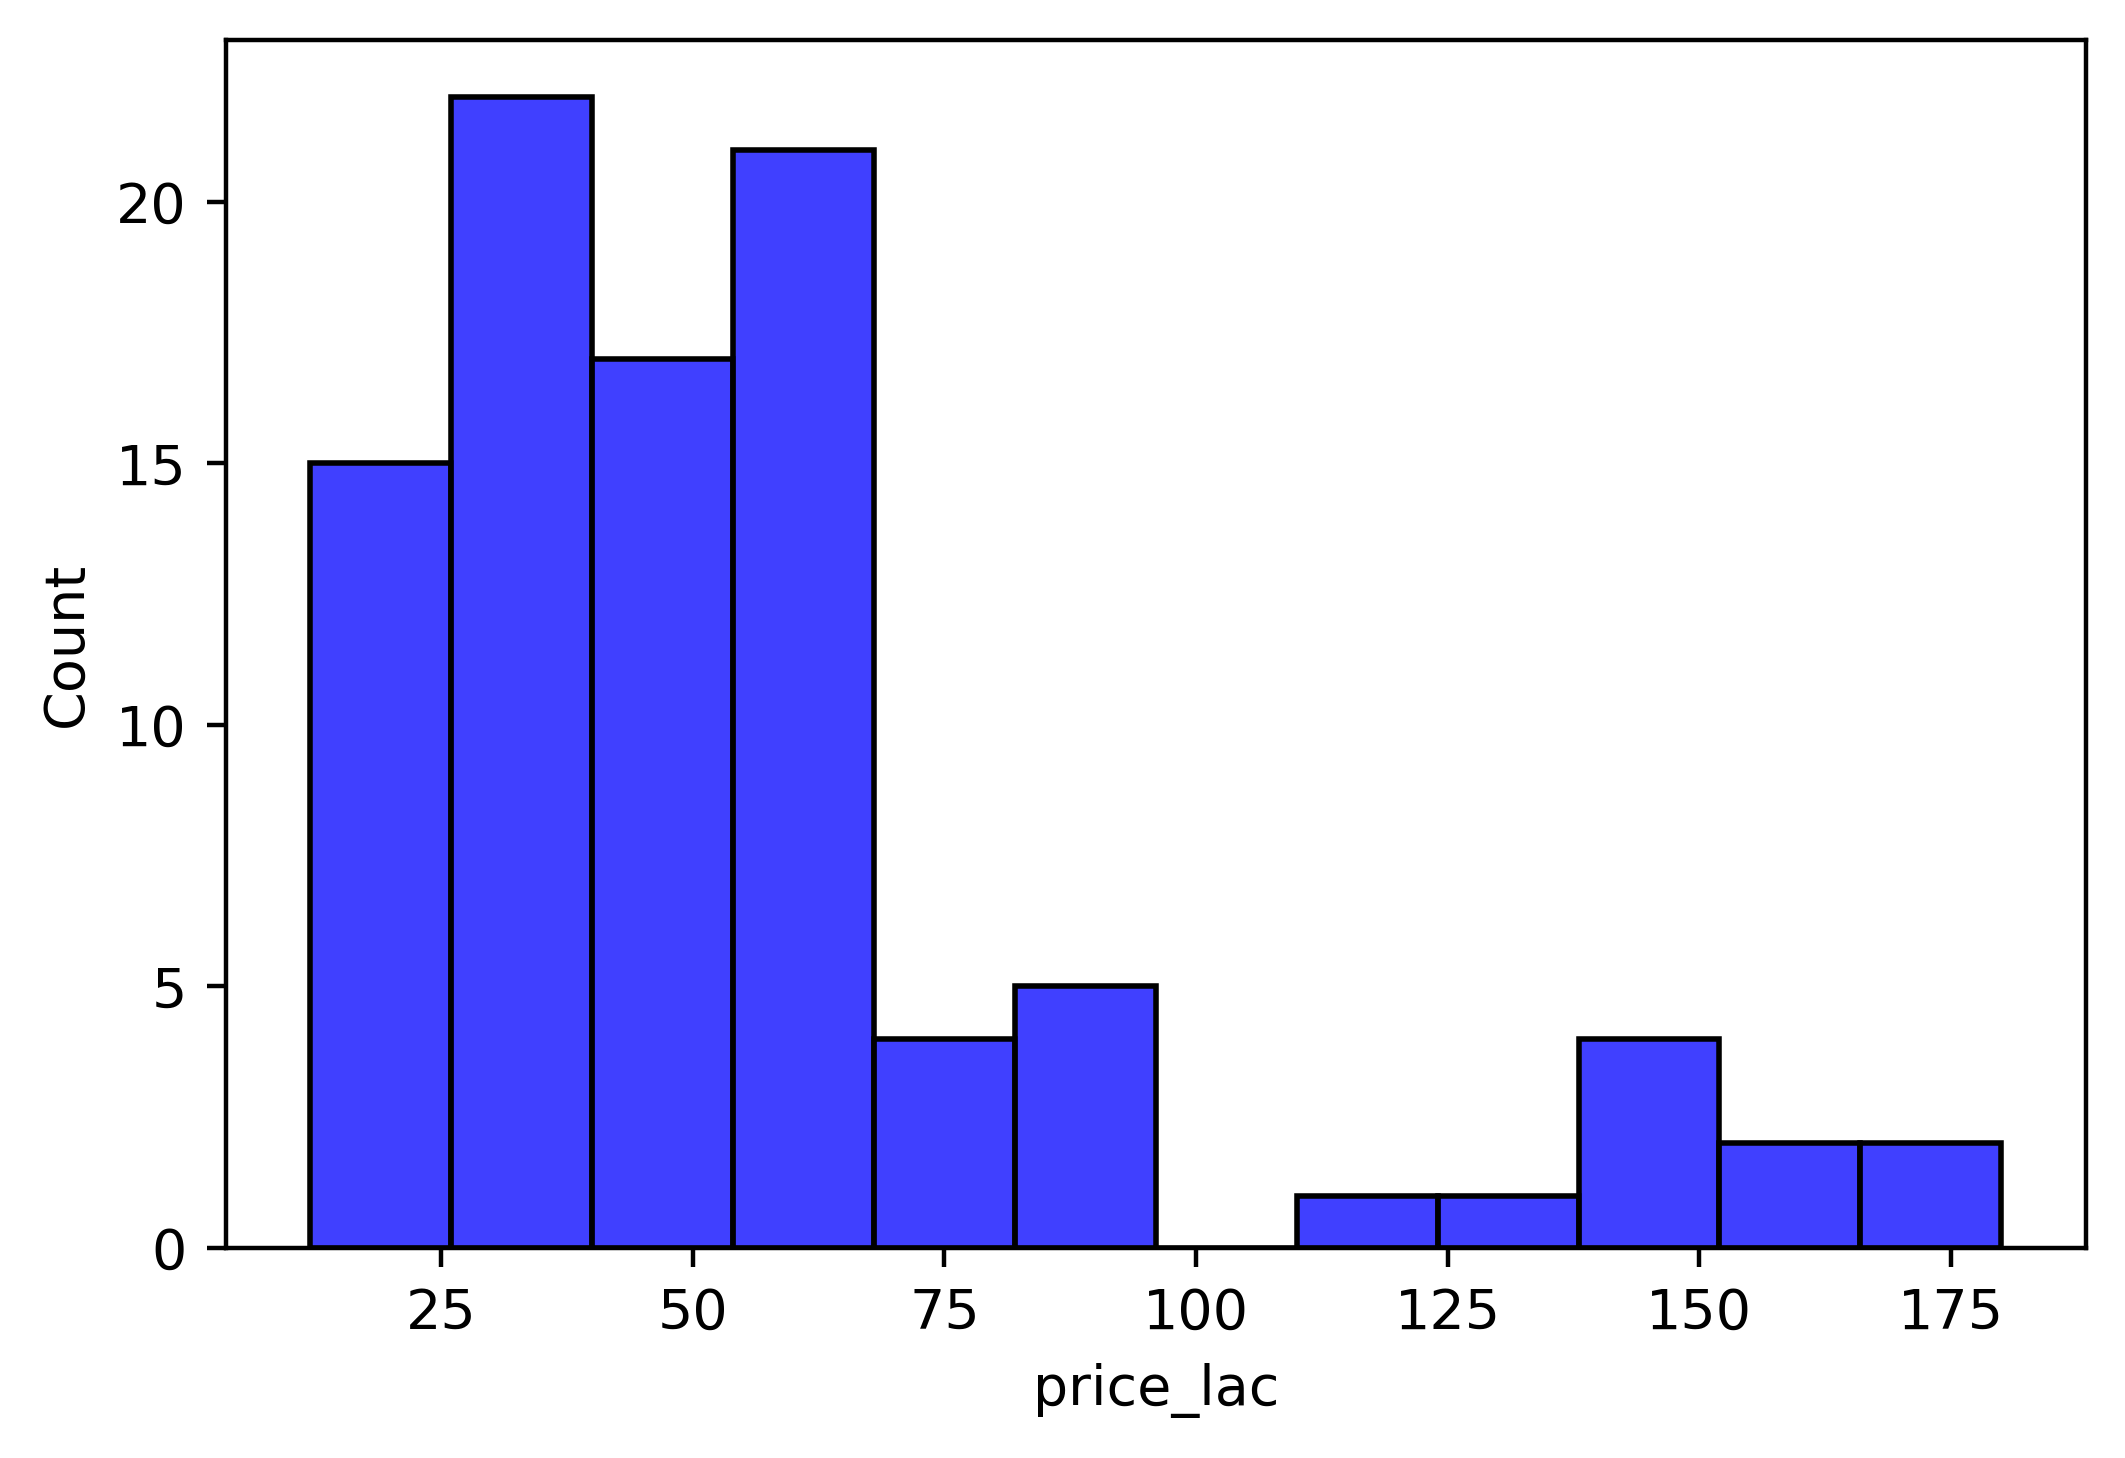

In [70]:
#Plotting Histogram
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
#Setting figure dimensions
figure(figsize=(6, 4), dpi=400)
#Plotting histogram
sns.histplot(x = 'price_lac', data = df, color = 'Blue')
plt.show()
plt.close()

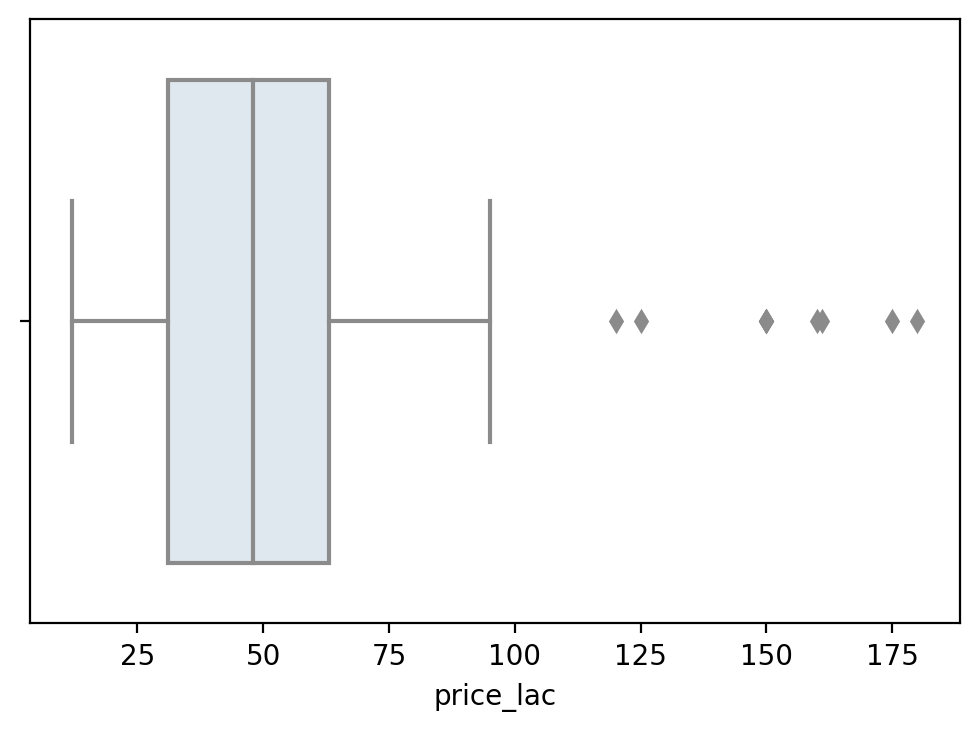

In [71]:
#Plotting Boxplot
from matplotlib.pyplot import figure
import seaborn as sns
#Setting color palette
sns.set_palette("BuPu")
#Setting figure dimensions
figure(figsize=(6, 4), dpi=200)
#Plotting boxplot
sns.boxplot(x = 'price_lac', data = df)
plt.show()
plt.close()

In [72]:
df.property_type.mode()[0]

'Apartment'

In [73]:
count_propty_type = df.property_type.value_counts()
print(count_propty_type)

Apartment            55
Independent house    37
Builder floor         2
Name: property_type, dtype: int64


In [74]:
prop_propty_type = df.property_type.value_counts(normalize = True)
print(prop_propty_type)

Apartment            0.585106
Independent house    0.393617
Builder floor        0.021277
Name: property_type, dtype: float64


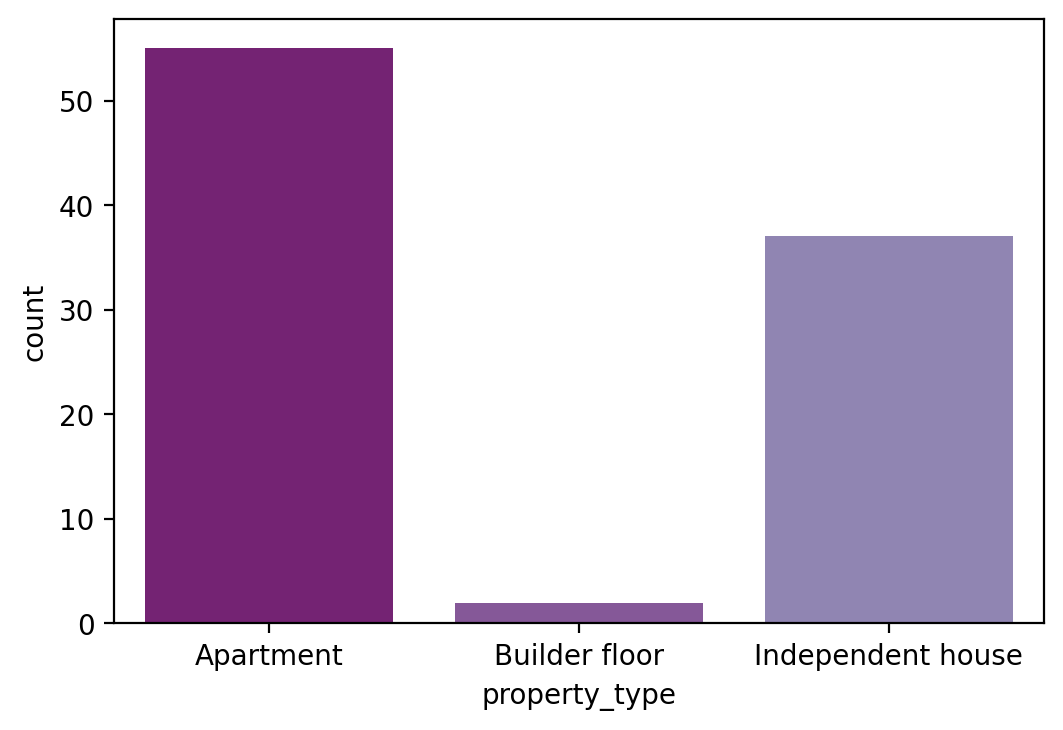

In [83]:
from matplotlib.pyplot import figure
import seaborn as sns
figure(figsize=(6, 4), dpi=200)
#Setting the color sche,e for the histplot
sns.set_palette("BuPu_r")
#Calling countplot function from seaborn to visualize frequency of race
sns.countplot(data = df, x = 'property_type')
plt.show()
plt.close()